In [20]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math

<font size = 4 color = black face = "Times New Roman">First I want to draw the picture of y(t), it can help us fund the region where the root located.

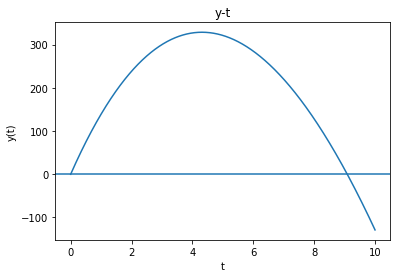

In [21]:
def f(t):
    return 9600 * (1 - np.exp(-t/15)) - 480 * t
def r(t):
    return 2400 * (1 - np.exp(-t/15))
t = np.linspace(0,10,10000)
y = f(t)
plt.plot(t, y, label = 'zero of f(x)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('y-t')
plt.axhline(y=0)
plt.show()

<font size = 4 color = black face = "Times New Roman">Easily to find that the root is in the region (8, 10). Please pay attention that we have another solution $t=0$, we will meet and discuss it later.

<font size = 4 color = black face = "Times New Roman">Method 1: bisection method

In [22]:
def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    f_R = f(x_R)
    x_M = (x_L + x_R) / 2.0
    f_M = f(x_M)
    iteration_counter = 0
    if f_L*f_R > 0:
        print("""Error! Function does not have opposite 
                signs at interval endpoints!""")
    while abs(f_M) > eps: 
        if f_L*f_M < 0:
            x_R = x_M
            f_R = f_M
        else:
            x_L = x_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1
    return x_M, iteration_counter

In [23]:
t_elapsed, counter = bisection(f, 10, 8, 10**(-10))
x_elapsed = r(t_elapsed)
print('The elapsed time is {:.10f}'.format(t_elapsed))
print('The range is {:.10f}'.format(x_elapsed))
print('This program runs {:d} times'.format(counter))

The elapsed time is 9.0878996688
The range is 1090.5479602541
This program runs 39 times


<font size = 4 color = black face = "Times New Roman">Method 2: the inverse interpolation method

In [28]:
def inverse(f, x1, x2, eps):
    f_x1 = f(x1)
    f_x2 = f(x2)
    iteration_counter = 0
    while abs(f_x2) > eps:
        try:
            denominator = (f_x1 - f_x2)/(x1 - x2)
            x2 = x1 - f_x1 / denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1)
        f_x2 = f(x2)
        iteration_counter = iteration_counter + 1
    return x2, iteration_counter

In [29]:
t_elapsed, counter = inverse(f, 10, 8, 10**(-10))
x_elapsed = r(t_elapsed)
print('The elapsed time is {:.10f}'.format(t_elapsed))
print('The range is {:.10f}'.format(x_elapsed))
print('This program runs {:d} times'.format(counter))

The elapsed time is 9.0878996688
The range is 1090.5479602542
This program runs 11 times


<font size = 4 color = black face = "Times New Roman">Method 3: the sacant method

In [32]:
def secant(f, x2, x1, eps):
    f_x2 = f(x2)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x2) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x2)/(x1 - x2)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x2)
            sys.exit(1)
        x2 = x1
        x1 = x
        f_x2 = f(x2)
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [40]:
t_elapsed, counter = secant(f, 5, 10, 10**(-10))
x_elapsed = r(t_elapsed)
if counter < 0:
    print('Root Not Found.')
elif t_elapsed < 8:
    print('We Get An Error Solution. Please Choose Another Interval.')
else:
    print('The elapsed time is {:.10f}'.format(t_elapsed))
    print('The range is {:.10f}'.format(x_elapsed))
    print('This program runs {:d} times'.format(counter))

The elapsed time is 9.0878996688
The range is 1090.5479602542
This program runs 7 times


<font size = 4 color = black face = "Times New Roman">Now we have calculated the elapsed time by using all three methods. Comparing the results, we can find that the bisection run the max number of times while the secant method just run 5 times. So for this problem, the secant method seems to be the best method.

<font size = 4 color = black face = "Times New Roman">But there is still one problem for secant method. We can easily find that $t = 0$ is also a solution for $y(t) = 0$, and we can see it directly from the picture of y-t above. So if we choose interval randomly, we may get the solution t = 0. Unluckily, we can't avoid this case in principle. In this situation, we must choose another interval.